In [2]:
!pip install astropy
!pip install scikit-image

  Using cached astropy-6.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (10 kB)
  Using cached numpy-2.0.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pyerfa-2.0.1.4-cp39-abi3-macosx_11_0_arm64.whl.metadata (5.7 kB)
Using cached astropy-6.1.1-cp311-cp311-macosx_11_0_arm64.whl (6.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.7 MB/s eta 0:00:0000:0100:01
Using cached numpy-2.0.0-cp311-cp311-macosx_14_0_arm64.whl (5.2 MB)
Using cached pyerfa-2.0.1.4-cp39-abi3-macosx_11_0_arm64.whl (329 kB)

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached scikit_image-0.24.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached scipy-1.14.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached pillow-10.4.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached imageio-2.34.2-py3-none-any.whl.m

In [1]:
import datetime
from astropy.visualization import make_lupton_rgb

In [2]:
import numpy as np
from astropy.io import fits
img = "12703.png"
ff = fits.open('manga/manga-7443-12703-LOGCUBE.fits.gz')
ff.info()

Filename: manga/manga-7443-12703-LOGCUBE.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (74, 74, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (74, 74, 4563)   float32   
  3  MASK          1 ImageHDU        17   (74, 74, 4563)   int32   
  4  LSFPOST       1 ImageHDU        11   (74, 74, 4563)   float32   
  5  LSFPRE        1 ImageHDU        11   (74, 74, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   15R x 65C   [25A, 17A, 5A, J, I, 9A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

In [3]:
from skimage.transform import resize
def image_transform_resize(img, new_shape):
    """
    Resize an image to new dimensions (e.g. to feed into a deep learning
    network).
    Parameters
    ----------
    img : np.ndarray
        Input image
    new_shape : tuple
        Expected new shape for image
    Returns
    -------
    np.ndarray
        Reshaped image
    """
    return resize(img, new_shape, preserve_range=True)

In [4]:
def process(img, size):
    """ reprocess the array image data """
    return (image_transform_resize(np.flipud(img), (size, size)) / np.max(img)) * 255

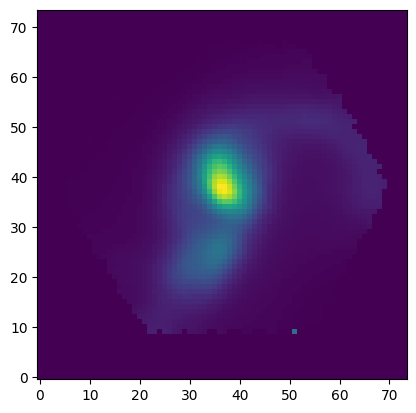

In [5]:
import matplotlib.pyplot as plt
plt.imshow(ff['GIMG'].data, origin='lower')

In [27]:
from ipywidgets import Image, Output
from ipycanvas import Canvas

# create "rgb" image data from cube reconstructed g,r,i images
size = 740
blue_channel = process(ff['GIMG'].data, size)
red_channel = process(ff['RIMG'].data, size)
green_channel = process(ff['IIMG'].data, size)
image_data = np.stack((red_channel, blue_channel, green_channel), axis=2)

# create lupton rgb image
rgb_default = make_lupton_rgb(ff['IIMG'].data, ff['RIMG'].data, ff['GIMG'].data, stretch=0.5, Q=10)
rr = resize(np.flipud(rgb_default), (size,size), preserve_range=True)

# create canvas
canvas = Canvas(width=size, height=size, sync_image_data=True)
canvas.put_image_data(rr, 0, 0)

# collect mouse output
out = Output()

path = []

@out.capture()
def handle_mouse_move(x, y):
    f = datetime.datetime.now().time().isoformat()
    print("Mouse move event:", x, y, f)
    path.append((x,y,f))

canvas.on_mouse_move(handle_mouse_move)

# render the canvas
canvas

Canvas(height=740, sync_image_data=True, width=740)

In [28]:
# rgb png image
sprite1 = Image.from_file("manga/12703.png")
cc = Canvas(width=562, height=562)
cc.draw_image(sprite1, 0, 00)
cc

Canvas(height=562, width=562)

In [46]:
maps = fits.open('manga/manga-7443-12703-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz')
maps.info()

Filename: manga/manga-7443-12703-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   ()      
  1  SPX_SKYCOO    1 ImageHDU        44   (74, 74, 2)   float32   
  2  SPX_ELLCOO    1 ImageHDU        49   (74, 74, 4)   float32   
  3  SPX_MFLUX     1 ImageHDU        37   (74, 74)   float32   
  4  SPX_MFLUX_IVAR    1 ImageHDU        38   (74, 74)   float32   
  5  SPX_SNR       1 ImageHDU        35   (74, 74)   float32   
  6  BINID         1 ImageHDU        46   (74, 74, 5)   int32   
  7  BIN_LWSKYCOO    1 ImageHDU        44   (74, 74, 2)   float32   
  8  BIN_LWELLCOO    1 ImageHDU        49   (74, 74, 4)   float32   
  9  BIN_AREA      1 ImageHDU        36   (74, 74)   float32   
 10  BIN_FAREA     1 ImageHDU        35   (74, 74)   float32   
 11  BIN_MFLUX     1 ImageHDU        38   (74, 74)   float32   
 12  BIN_MFLUX_IVAR    1 ImageHDU        39   (74, 74)   float32   
 13  BIN_MFLUX_MASK    1

In [47]:
for e, i in enumerate(path):
    x, y, t = i
    x = int(x/10)
    y = int(y/10)
    sv = maps["STELLAR_VEL"].data[x, y]

In [48]:
def get_properties(maps):
    tmp = []
    for e, i in enumerate(path):
        x, y, t = i
        x = int(x/10)
        y = int(y/10)
        sv = maps["STELLAR_VEL"].data[y, x]
        ss = maps["STELLAR_SIGMA"].data[x, y]
        hb = maps["EMLINE_GFLUX"].data[14, x, y]
        oiii_a = maps["EMLINE_GFLUX"].data[15, x, y]
        oiii_b = maps["EMLINE_GFLUX"].data[16, x, y]
        ha = maps["EMLINE_GFLUX"].data[23, x, y]
        tmp.append((t, x, y, sv, ss, ha, hb, oiii_a, oiii_b))
    return tmp

In [49]:
props = get_properties(maps)

In [50]:
import pandas as pd

In [51]:
props

[('15:21:47.318354', 47, 2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 ('15:21:47.327228', 46, 6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 ('15:21:47.333767', 46, 9, 64.50366, 0.0, 0.0, 0.0, 0.0, 0.0),
 ('15:21:47.340349',
  45,
  12,
  64.50366,
  0.0,
  0.31090143,
  0.022968935,
  0.025926815,
  0.074076615),
 ('15:21:47.356951',
  44,
  15,
  64.50366,
  0.69029766,
  0.36705697,
  0.08894409,
  0.055156402,
  0.15758972),
 ('15:21:47.372236',
  44,
  18,
  113.23134,
  0.69029766,
  0.5025037,
  0.118676275,
  0.07994784,
  0.22842239),
 ('15:21:47.381090',
  43,
  18,
  113.23134,
  0.69029766,
  0.55272526,
  0.107984036,
  0.084571846,
  0.24163385),
 ('15:21:47.388328',
  43,
  19,
  101.26184,
  0.69029766,
  0.60081756,
  0.10538396,
  0.073469914,
  0.20991404),
 ('15:21:47.397934',
  43,
  20,
  101.26184,
  21.837786,
  0.7025967,
  0.14311947,
  0.075014375,
  0.2143268),
 ('15:21:47.781999',
  43,
  45,
  52.588577,
  167.84203,
  5.2532516,
  1.0789648,
  0.37283963,
  1.065256),
 ('15:21

In [52]:
df = pd.DataFrame(props, columns=['time', 'x', 'y', 'stellar_vel', 'stellar_sigma', 'emline_ha', 'emline_hb', 'emline_oiii4960', 'emline_oiii5008'])

In [38]:
# add time delta info
st = datetime.time.fromisoformat(df['time'].iloc[0])
date = datetime.datetime.now().date()
dt = datetime.datetime.combine(date, st)
df['timedelta'] = df['time'].apply(lambda x: (datetime.datetime.combine(date,datetime.time.fromisoformat(x))-dt).total_seconds())
df

,time,x,y,stellar_vel,stellar_sigma,emline_ha,emline_hb,emline_oiii4960,emline_oiii5008,timedelta
0,15:21:47.318354,47,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,15:21:47.327228,46,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008874
2,15:21:47.333767,46,9,64.503662,0.000000,0.000000,0.000000,0.000000,0.000000,0.015413
3,15:21:47.340349,45,12,64.503662,0.000000,0.310901,0.022969,0.025927,0.074077,0.021995
4,15:21:47.356951,44,15,64.503662,0.690298,0.367057,0.088944,0.055156,0.157590,0.038597
...,...,...,...,...,...,...,...,...,...,...
184,15:21:50.844084,72,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.525730
185,15:21:50.852590,72,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.534236
186,15:21:50.860544,73,27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.542190
187,15:21:51.107770,73,27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.789416


In [39]:
df[50:].to_csv('manga/manga_7443_12703_path_props.csv', index=False)

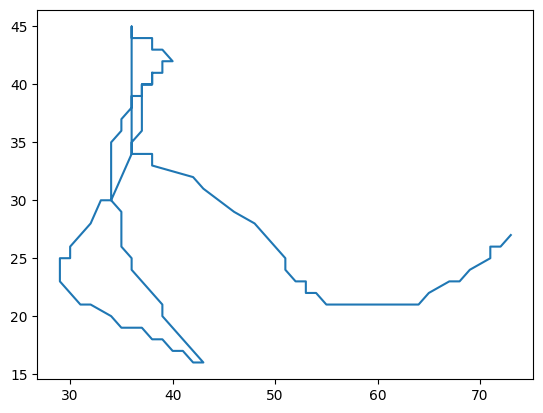

In [40]:
plt.plot(df['x'][49:], df['y'][49:])

In [41]:
canvas.to_file("manga_7443_12703_reconstructed_gri.png")

In [43]:
st = datetime.datetime.combine(date, datetime.time.fromisoformat(df['time'].iloc[0]))
et = datetime.datetime.combine(date, datetime.time.fromisoformat(df['time'].iloc[-1]))
td = (et-st).total_seconds()
td

3.805806

In [44]:
maps['STELLAR_VEL'].data[22,35]

132.42809

In [45]:
path[129]

(375.9079279795113, 402.3888523090381, '15:21:49.254257')

In [278]:
x, y, t = path[129]
print(x/10, y/10)

22.9 35.65833282470703


In [280]:
maps['STELLAR_VEL'].data[35,22]

63.804703